In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [2]:
song_database = pd.read_csv('song_database.csv')

In [3]:
song_database.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
X = song_database._get_numeric_data()

In [5]:
X = X[:500]

In [6]:
X

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.017100,0.440,329160.0,0.528,0.00203,0.0,0.2340,-7.809,1.0,0.0317,185.972,4.0,0.132
1,0.578000,0.604,224695.0,0.366,0.00000,5.0,0.1330,-7.519,1.0,0.0282,141.981,4.0,0.130
2,0.038300,0.591,141806.0,0.764,0.00000,1.0,0.1030,-5.484,1.0,0.0483,169.928,4.0,0.478
3,0.020300,0.736,212000.0,0.704,0.00000,3.0,0.0501,-7.409,0.0,0.0615,149.995,4.0,0.894
4,0.055800,0.627,197443.0,0.618,0.00000,2.0,0.3510,-8.529,1.0,0.0437,82.030,4.0,0.848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.552000,0.818,234702.0,0.622,0.00412,11.0,0.1140,-7.623,0.0,0.1560,130.033,4.0,0.439
496,0.001650,0.750,173347.0,0.608,0.00000,1.0,0.1780,-4.008,1.0,0.0387,132.507,4.0,0.958
497,0.123000,0.605,157880.0,0.881,0.00000,10.0,0.0380,-2.563,1.0,0.1530,193.788,4.0,0.928
498,0.000615,0.767,186809.0,0.678,0.00000,1.0,0.0952,-3.284,0.0,0.0686,142.060,4.0,0.791


In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0171,0.440,329160.0,0.528,0.00203,0.0,0.2340,-7.809,1.0,0.0317,185.972,4.0,0.132
1,0.5780,0.604,224695.0,0.366,0.00000,5.0,0.1330,-7.519,1.0,0.0282,141.981,4.0,0.130
2,0.0383,0.591,141806.0,0.764,0.00000,1.0,0.1030,-5.484,1.0,0.0483,169.928,4.0,0.478
3,0.0203,0.736,212000.0,0.704,0.00000,3.0,0.0501,-7.409,0.0,0.0615,149.995,4.0,0.894
4,0.0558,0.627,197443.0,0.618,0.00000,2.0,0.3510,-8.529,1.0,0.0437,82.030,4.0,0.848


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-0.881842,-1.483282,2.177456,-0.427888,-0.171972,-1.448365,0.506657,-0.298120,0.756523,-0.713983,2.233206,0.097063,-1.547080
1,1.183773,-0.357087,0.228415,-1.364199,-0.190437,-0.047083,-0.300231,-0.189156,0.756523,-0.745474,0.762370,0.097063,-1.555769
2,-0.803770,-0.446358,-1.318075,0.936122,-0.190437,-1.168109,-0.539901,0.575473,0.756523,-0.564630,1.696776,0.097063,-0.043796
3,-0.870058,0.549364,-0.008440,0.589340,-0.190437,-0.607596,-0.962519,-0.147825,-1.321837,-0.445868,1.030317,0.097063,1.763621
4,-0.739323,-0.199144,-0.280035,0.092286,-0.190437,-0.887852,1.441370,-0.568652,0.756523,-0.606017,-1.242088,0.097063,1.563762


In [8]:
X_scaled_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.975398e-17,-2.369216e-16,3.663736e-18,4.116707e-16,-1.513234e-16,-3.619327e-17,-5.151435e-17,9.237056e-17,9.414691e-17,-3.408385e-17,-1.305622e-16,-8.628653e-16,4.751755e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-9.446749e-01,-2.767420e+00,-2.787267e+00,-3.378426e+00,-1.904371e-01,-1.448365e+00,-1.191005e+00,-7.819285e+00,-1.321837e+00,-7.904594e-01,-1.890693e+00,-1.030257e+01,-1.955052e+00
25%,-7.903279e-01,-6.060170e-01,-6.922883e-01,-6.316220e-01,-1.904371e-01,-8.878522e-01,-6.070089e-01,-4.575275e-01,-1.321837e+00,-6.543771e-01,-8.388713e-01,9.706320e-02,-7.943518e-01
50%,-4.145104e-01,1.201733e-01,-5.885226e-02,6.627700e-02,-1.904371e-01,-4.708307e-02,-4.120773e-01,1.888373e-01,7.565230e-01,-4.553146e-01,-5.859173e-02,9.706320e-02,-4.693200e-03
75%,5.540344e-01,6.970054e-01,5.377915e-01,7.121587e-01,-1.901069e-01,7.936861e-01,2.510095e-01,6.264792e-01,7.565230e-01,2.266712e-01,7.031482e-01,9.706320e-02,7.360869e-01
max,2.678941e+00,2.135652e+00,7.473666e+00,2.178758e+00,7.677910e+00,1.634455e+00,4.453222e+00,1.833822e+00,7.565230e-01,6.360495e+00,3.000405e+00,3.563606e+00,2.098166e+00


In [9]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=3, random_state=1234)

In [10]:
kmeans.labels_

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2,

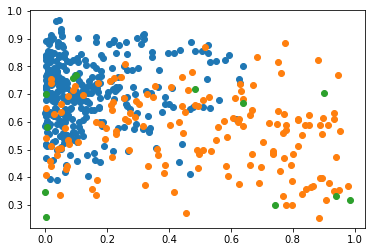

In [11]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 0], X.to_numpy()[row_ix, 1])
    # show the plot
pyplot.show()

In [12]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    332
1    156
2     12
dtype: int64